Loading in all TFRs for all intensities and 6 channels and comparing.

* comparing each intensity vs baseline
* comparing each intensity to intensity 1

In [6]:
# importations
import mne, fooof, numpy as np, pandas as pd, os, glob, sys
from mne.preprocessing import ICA
from IPython.display import display, Markdown
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.stats import zscore

In [15]:
save_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/tfr_pickles/'

# loading no-stim
fname = 'sub22_ses00_final.pkl'
with open(save_dir+fname, 'rb') as f:
    ctrl_dict = pickle.load(f)
    
# loading stim cond
fname = 'sub22_ses01_final.pkl'
with open(save_dir+fname, 'rb') as f:
    cond_dict = pickle.load(f)


In [20]:
freq_range =[1, 100]
freqs = np.logspace(*np.log10(freq_range), num=50)

In [21]:
# step 1: get the difference between matrices

def get_diff(cond_mat, ctrl_mat, freqs=freqs, plot=False):
    
    diff = cond_mat - ctrl_mat
    
    if plot:
        fig, ax = plt.subplots(nrows=3, figsize=(7, 18))

        sns.heatmap(cond_mat, cmap='Reds', yticklabels=np.flip(np.around(freqs, decimals=2)), ax=ax[0])#, center=0)
        ax[0].set_title('stim')

        sns.heatmap(ctrl_mat, cmap='Reds', yticklabels=np.flip(np.around(freqs, decimals=2)), ax=ax[1])#, center=0)
        ax[1].set_title('ctrl')


        sns.heatmap(diff, cmap='Reds', yticklabels=np.flip(np.around(freqs, decimals=2)), ax=ax[2])#, center=0)
        ax[2].set_title('diff')

        plt.tight_layout()
    return diff
                

In [22]:
def zscore_and_thresh(diff, thr=2.0, plot=False):
    t = zscore(diff)
    t_thr = t.copy()
    t_thr[np.abs(t_thr)<thr] = 0
    if plot:
        fig, ax = plt.subplots(nrows=2, figsize=(8, 14))
        sns.heatmap(t, cmap='viridis', yticklabels=np.flip(np.around(freqs, decimals=2)), ax=ax[0])#, center=0)
        ax[0].set_title('zscored')

        sns.heatmap(t_thr, cmap='viridis', yticklabels=np.flip(np.around(freqs, decimals=2)), ax=ax[1])#, center=0)
        ax[1].set_title(f'thr at {thr}');
        plt.tight_layout()
    
    return t, t_thr

In [19]:
# I will select channels and output ctr and cnd matrices. 2 ways: compared to baseline and compared to int 1

In [12]:
files = sorted(glob.glob('/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/tfr_pickles/*sub22*'))
files

['/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/tfr_pickles/sub22_ses00_final.pkl',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/tfr_pickles/sub22_ses01_final.pkl',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/tfr_pickles/sub22_ses02_final.pkl',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/tfr_pickles/sub22_ses03_final.pkl',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/tfr_pickles/sub22_ses04_final.pkl',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/tfr_pickles/sub22_ses05_final.pkl',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/tfr_pickles/sub22_ses06_final.pkl',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/tfr_pickles/sub22_ses07_final.pkl',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/tfr_pickles/sub22_ses08_final.pkl',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/tfr_pickles/sub22_ses09_final.pkl',
 '/externa

## baseline comparison


In [18]:
def give_me_zscored_diffs(ch, ctrl_int, cond_int, sub='sub22', thr=1.64, plot=True):
    
    #loading
    fname = f'{sub}_ses{ctrl_int}_final.pkl'
    with open(save_dir+fname, 'rb') as f:
        ctrl_dict = pickle.load(f)

    fname = f'{sub}_ses{cond_int}_final.pkl'
    with open(save_dir+fname, 'rb') as f:
        cond_dict = pickle.load(f)
    
    
    cnd = cond_dict[ch]['avg']
    ctr = ctrl_dict[ch]['avg']
    diff = get_diff(cnd, ctr)
    
    zscore_diff, thrshd = zscore_and_thresh(diff, thr=thr)
    
    if plot:
        fig, ax = plt.subplots(figsize=(9, 8))
        sns.heatmap(thrshd, cmap='viridis', yticklabels=np.flip(np.around(freqs, decimals=2)), 
                    ax=ax, center=0, vmi)
        ax.set_title(f'diff of int {cond_int} vs {ctrl_int},    {ch}')
    return zscore_diff

In [14]:
ints = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
save_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/tfr_pickles/'

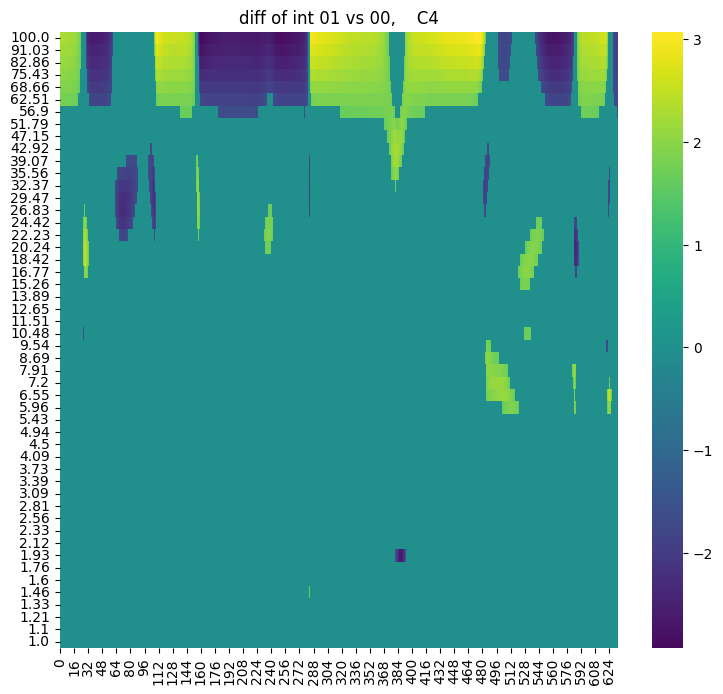

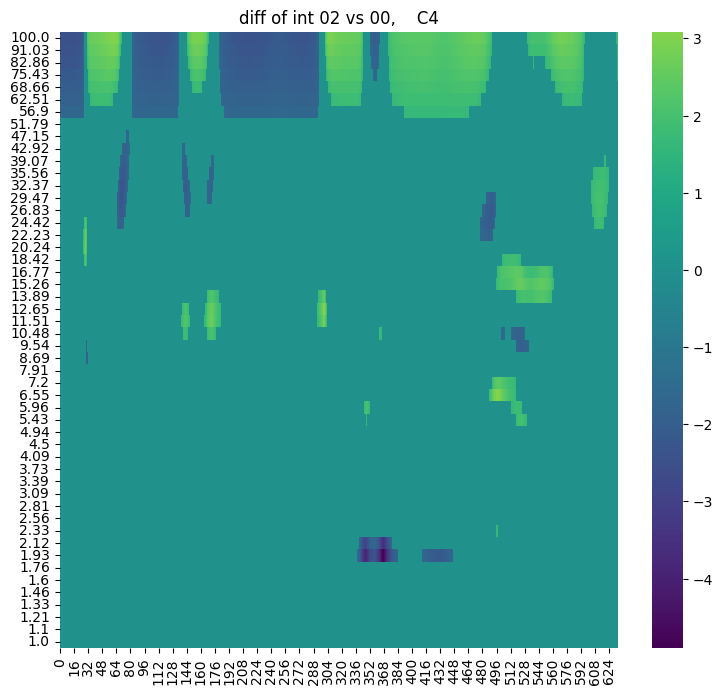

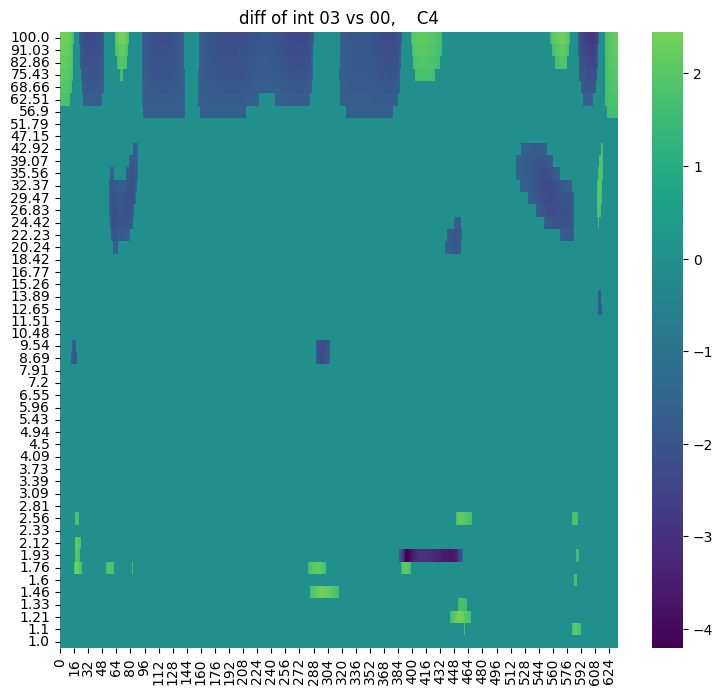

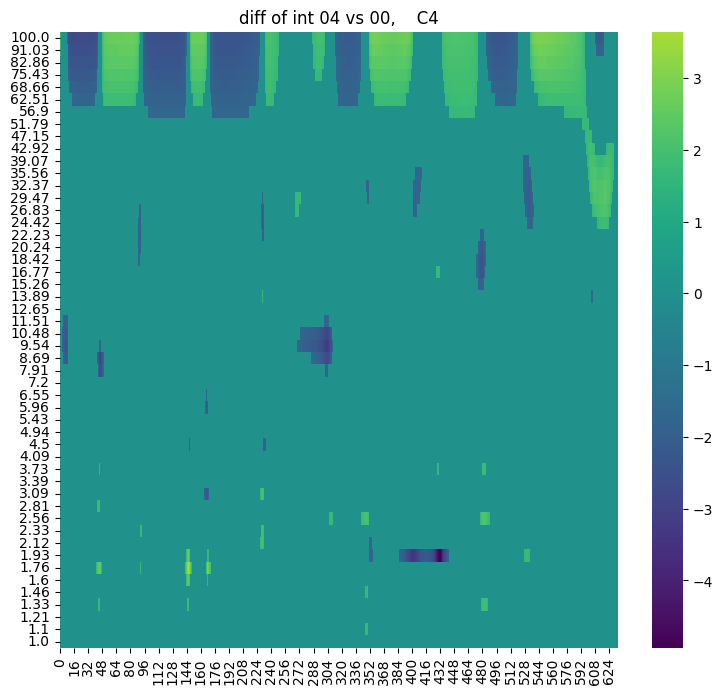

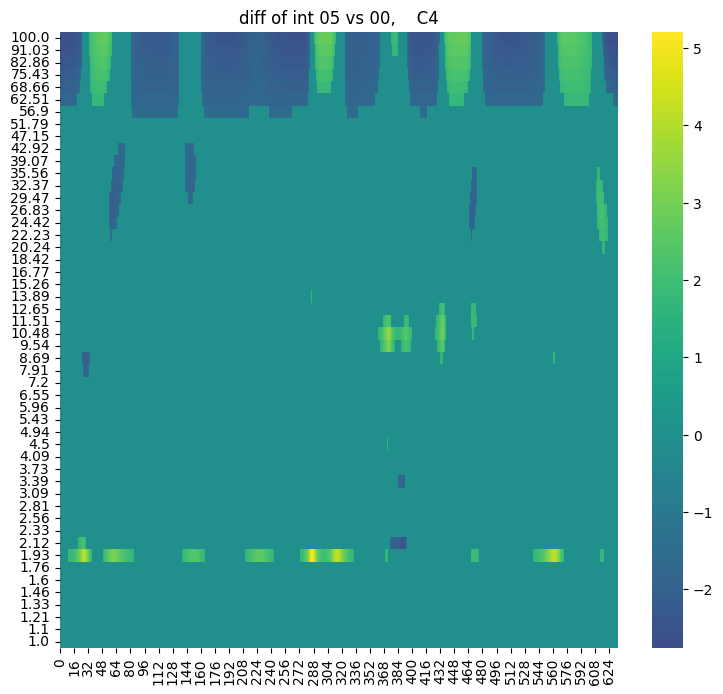

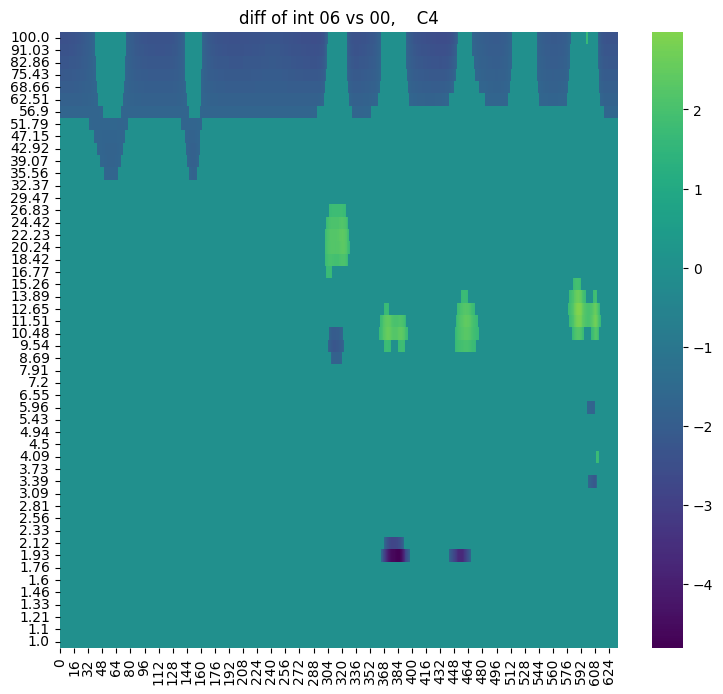

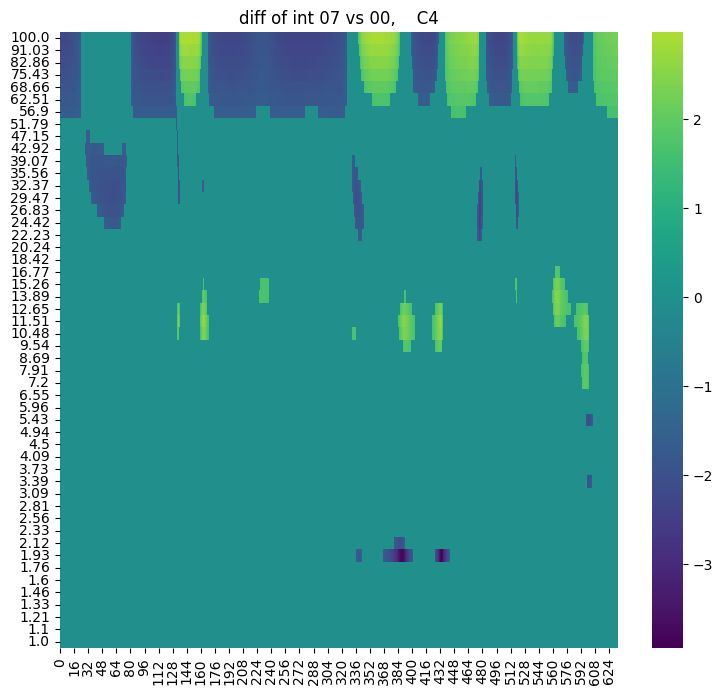

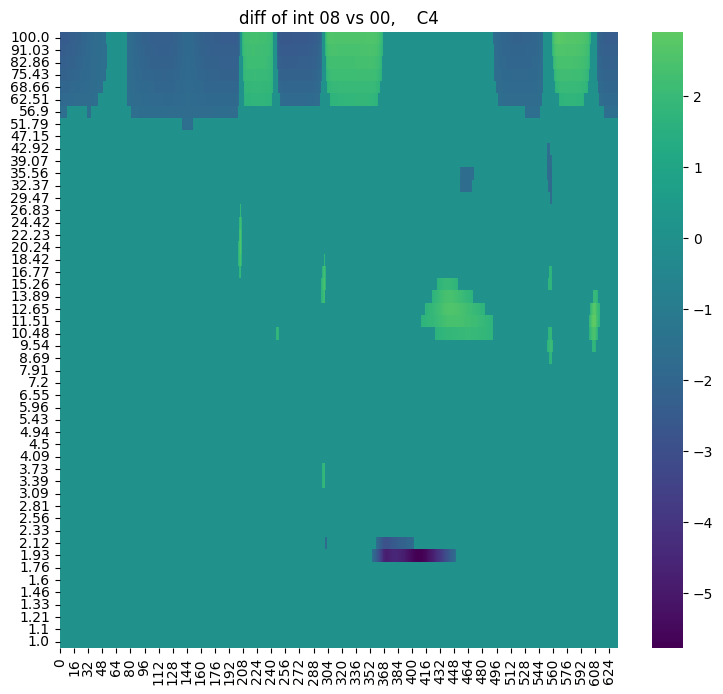

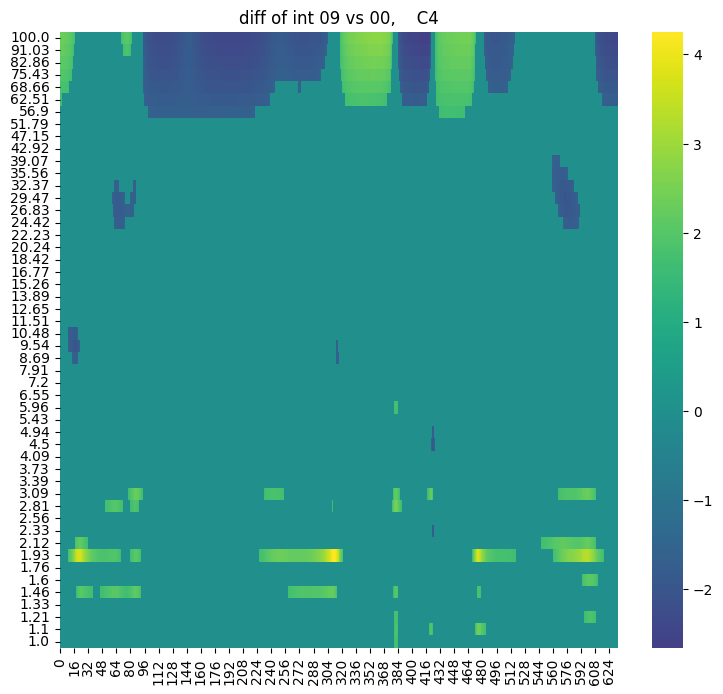

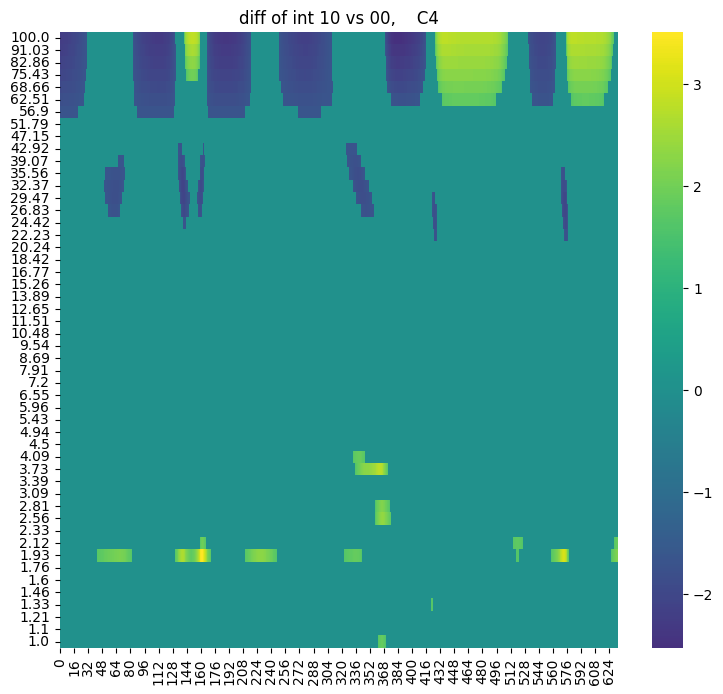

In [23]:
# baseline comp
baseline_diffs = dict()

for int_lv in ints[1:]:
    baseline_diffs[int_lv] = give_me_zscored_diffs('C4', '00', int_lv, sub='sub20')

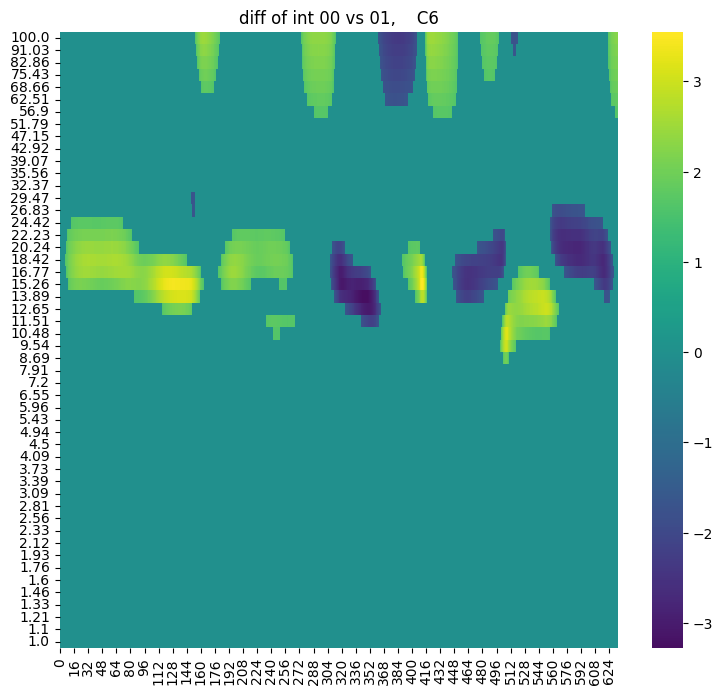

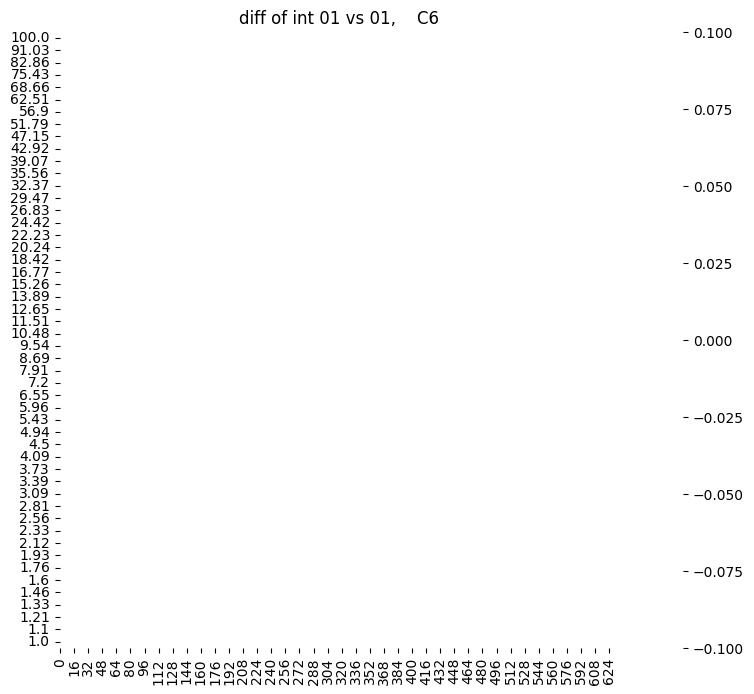

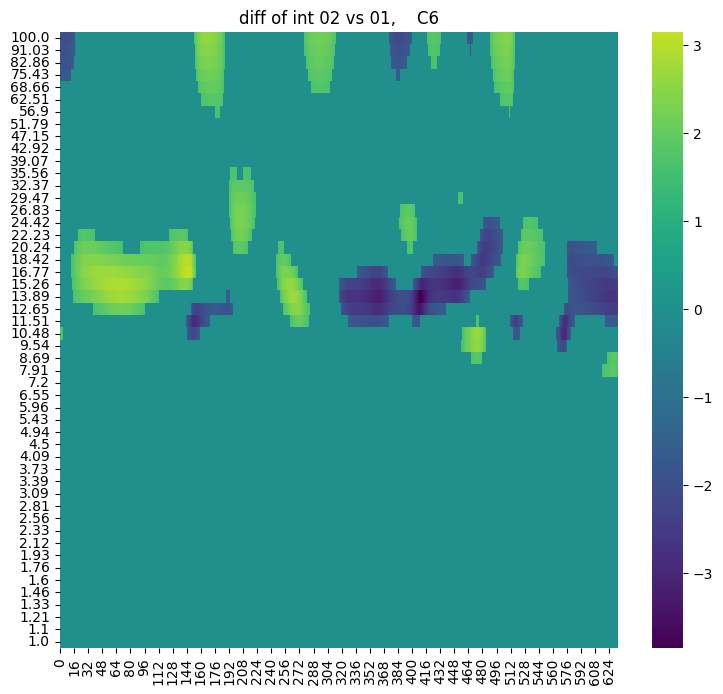

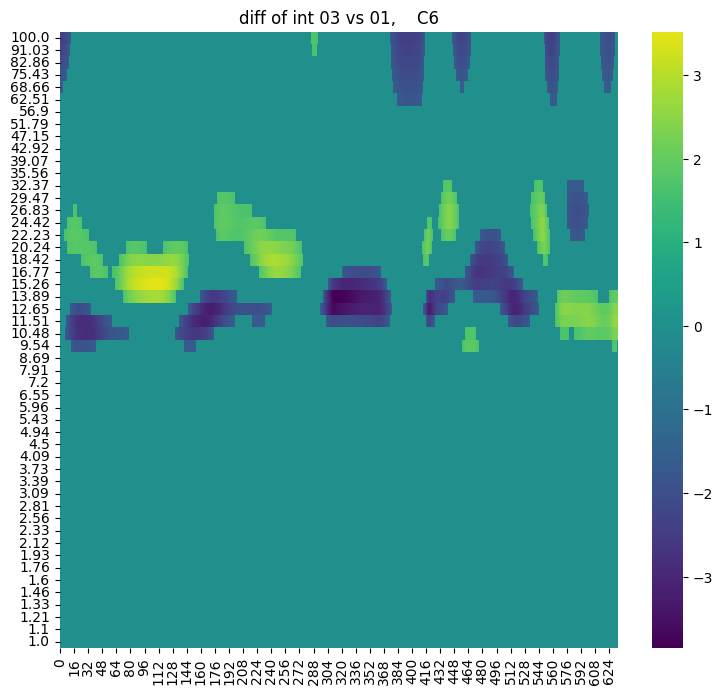

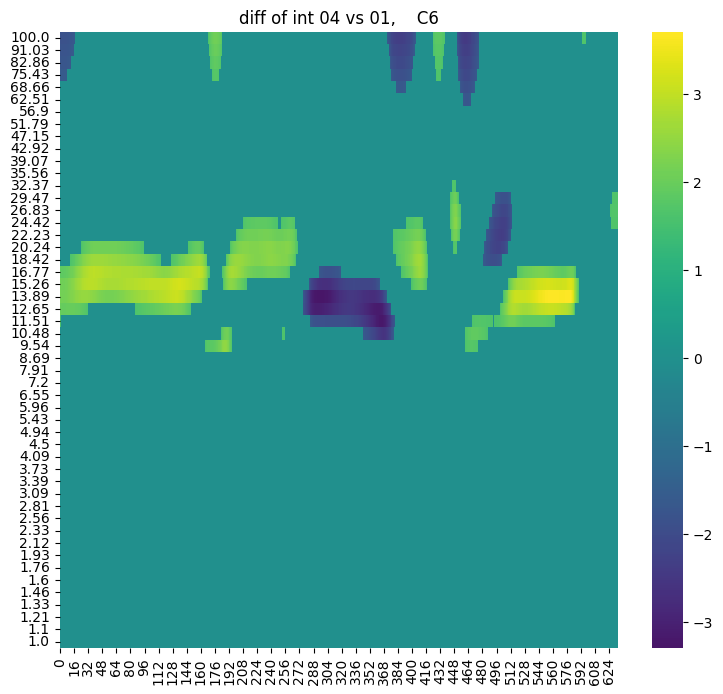

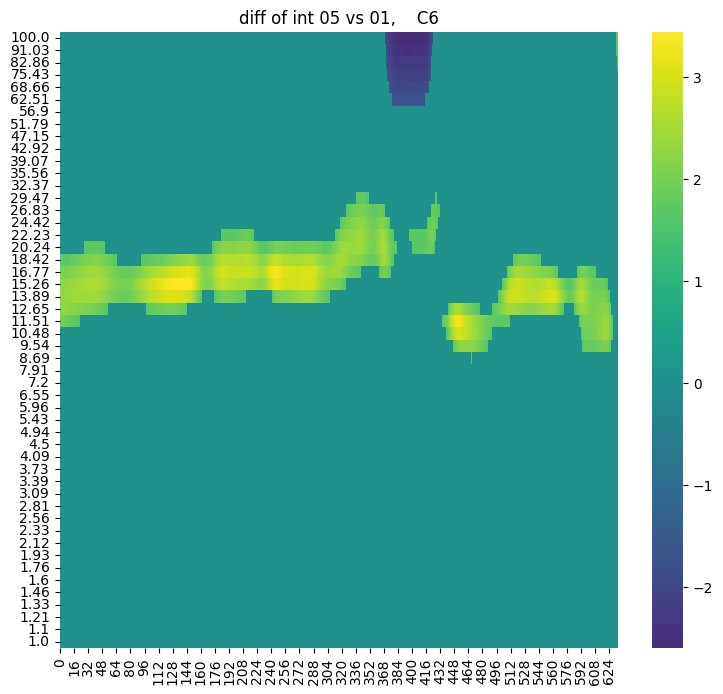

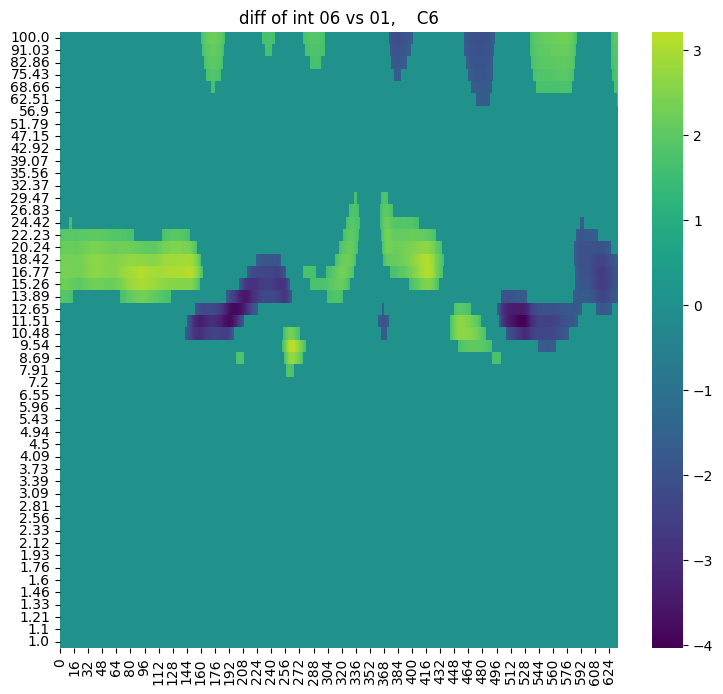

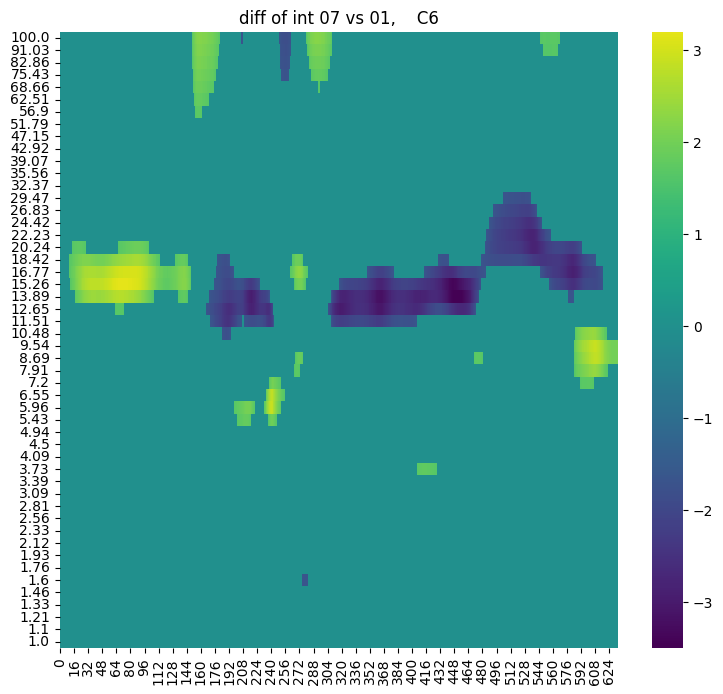

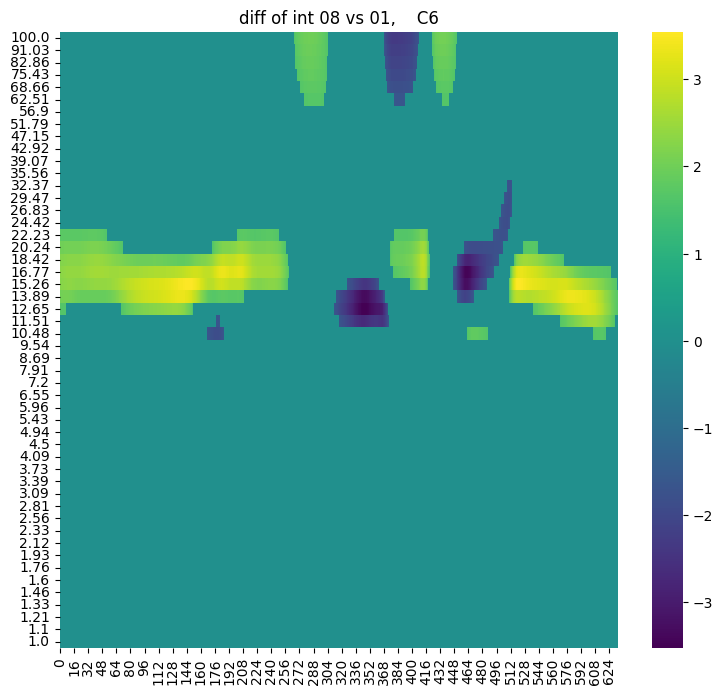

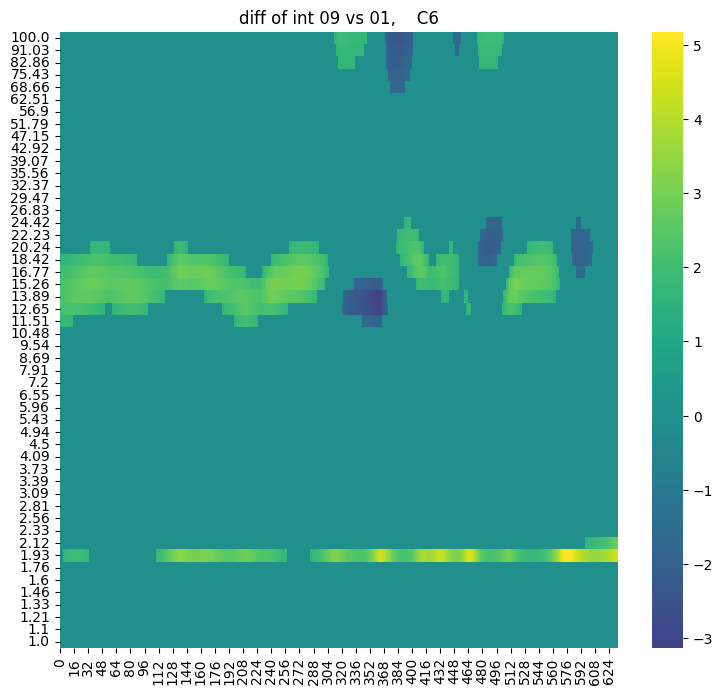

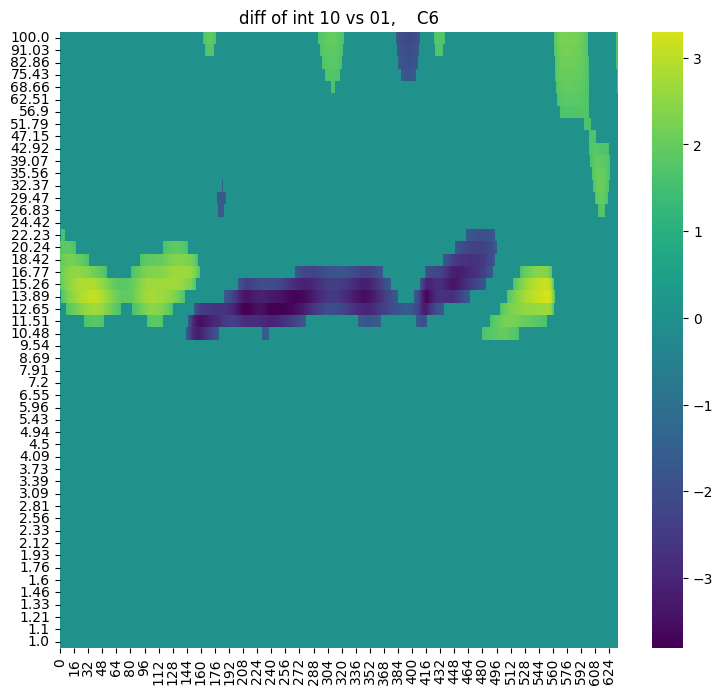

In [25]:
# baseline comp
lowest_int_diffs = dict()

for int_lv in ints:
    lowest_int_diffs[int_lv] = give_me_zscored_diffs('C6', '01', int_lv)

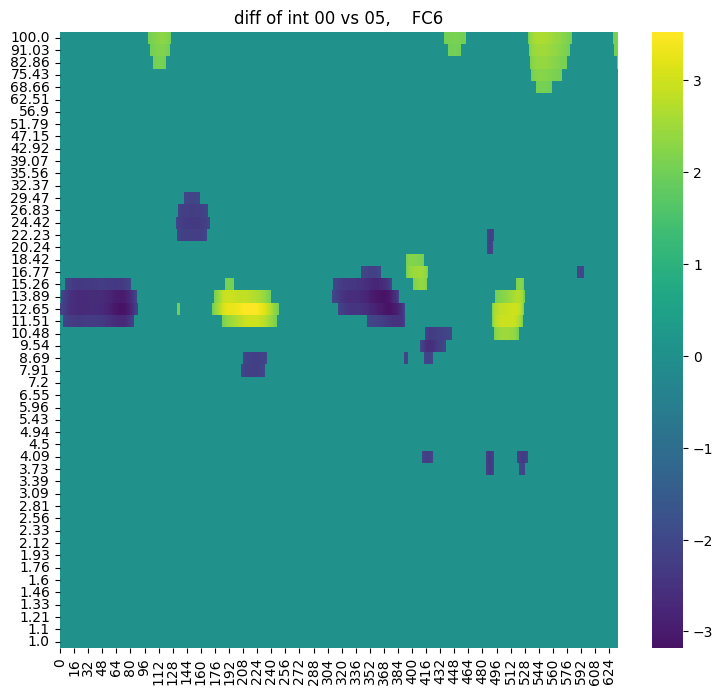

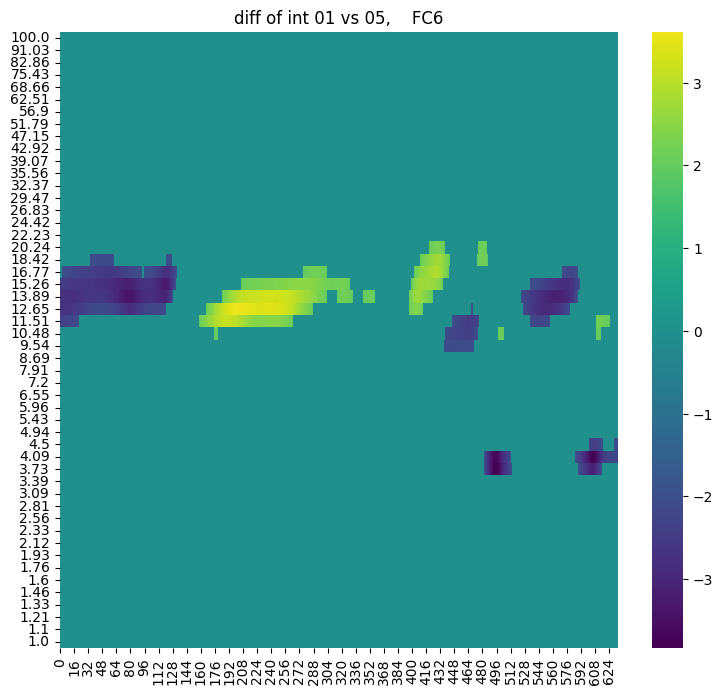

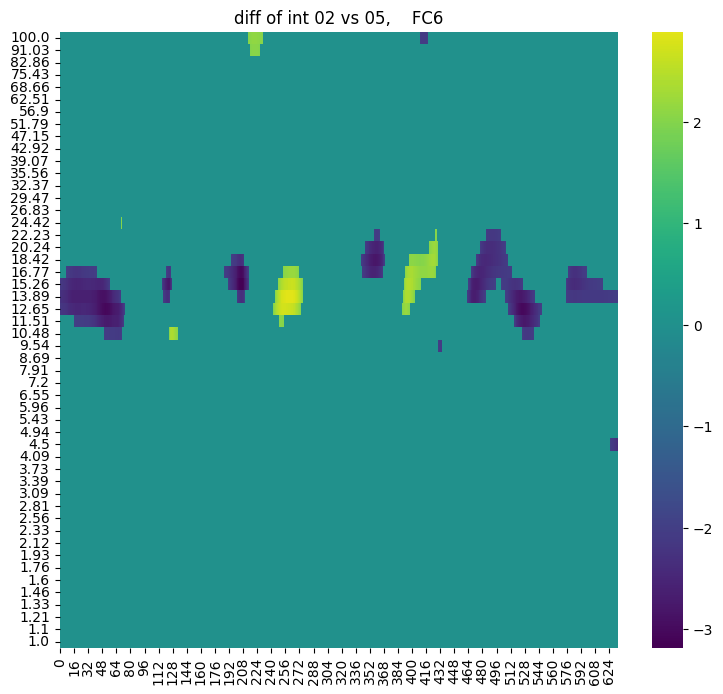

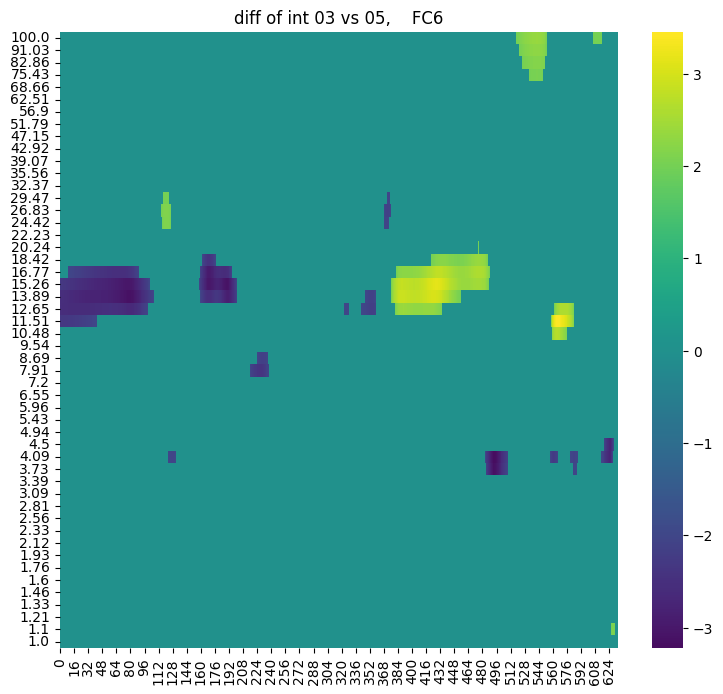

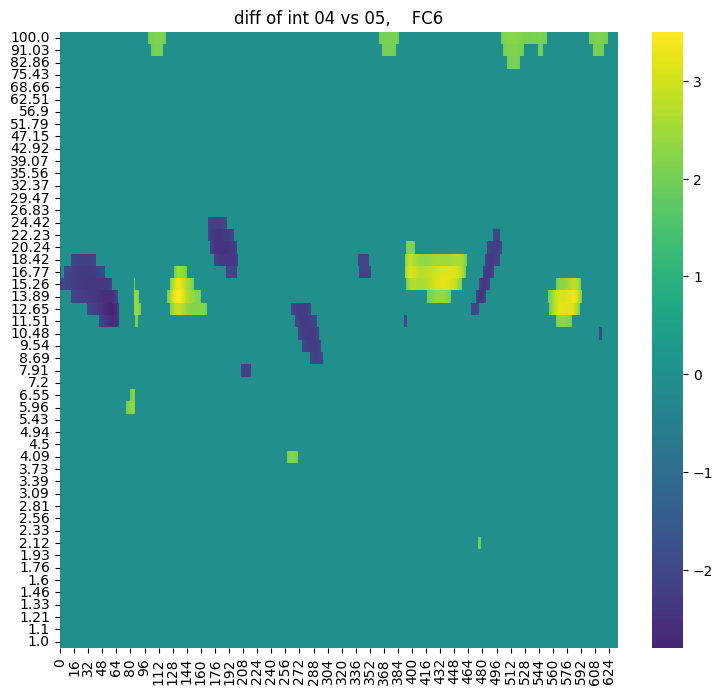

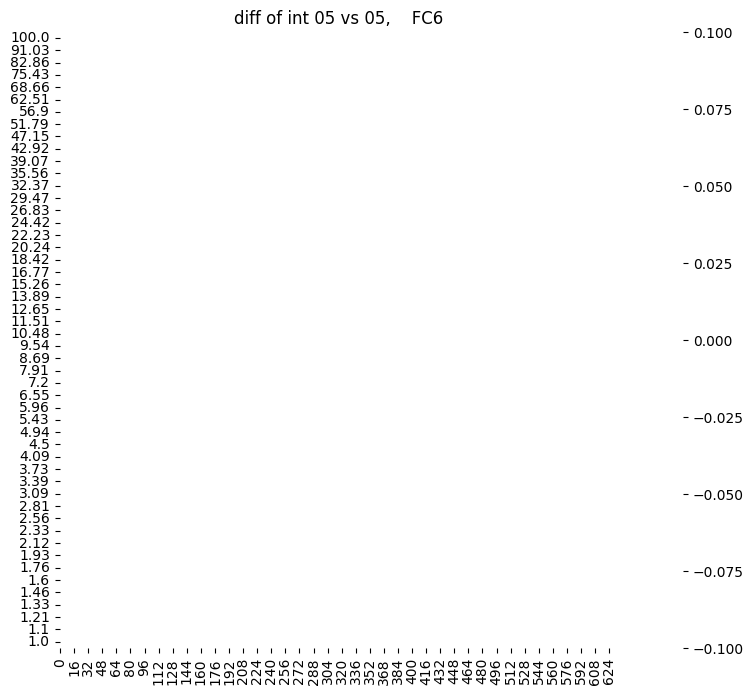

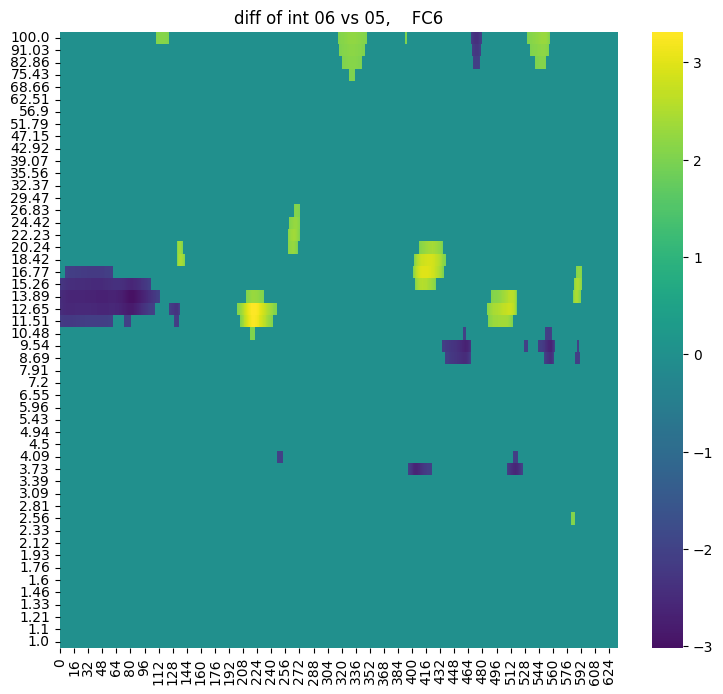

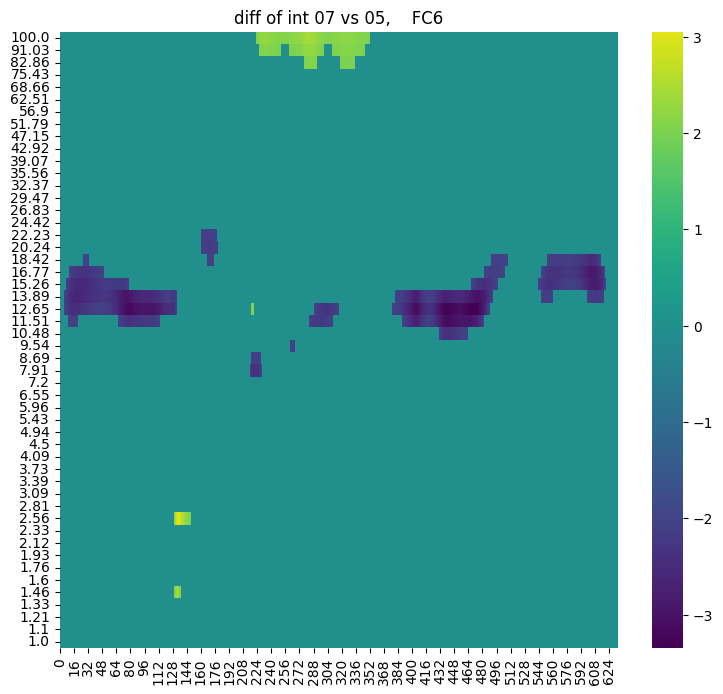

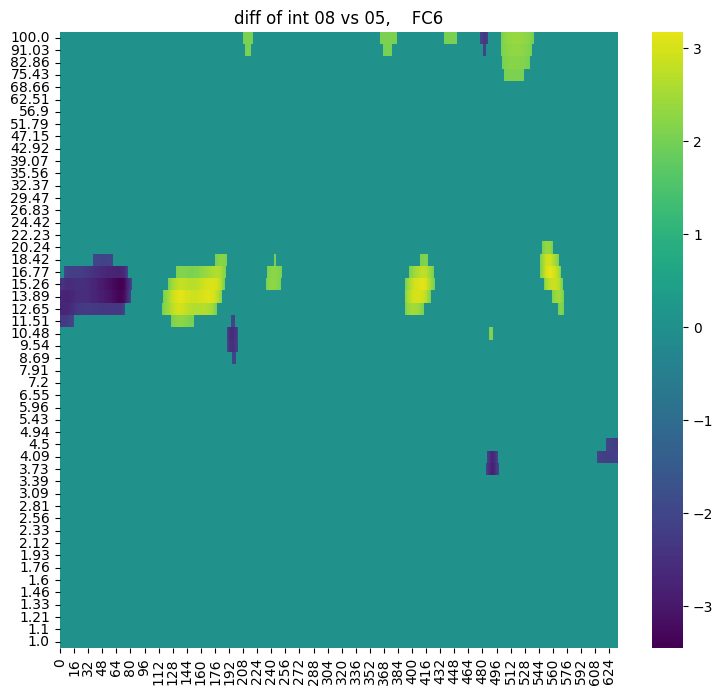

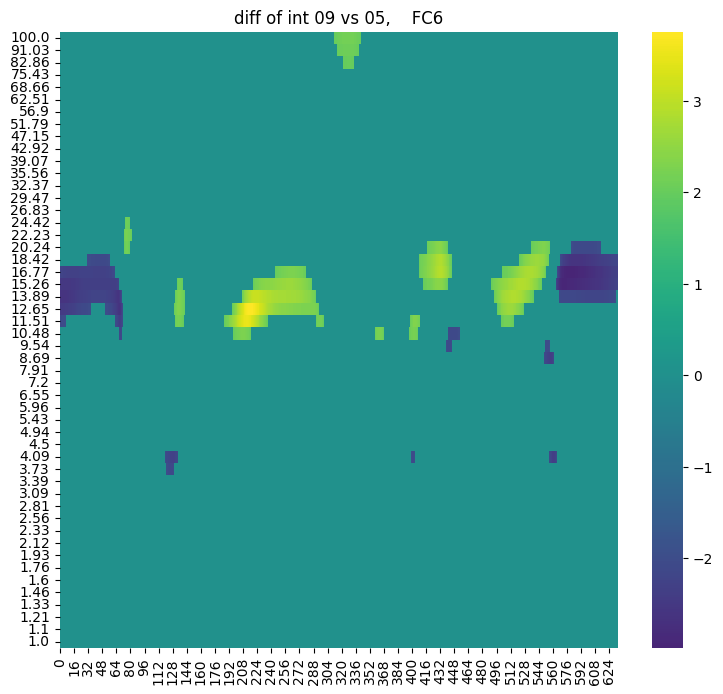

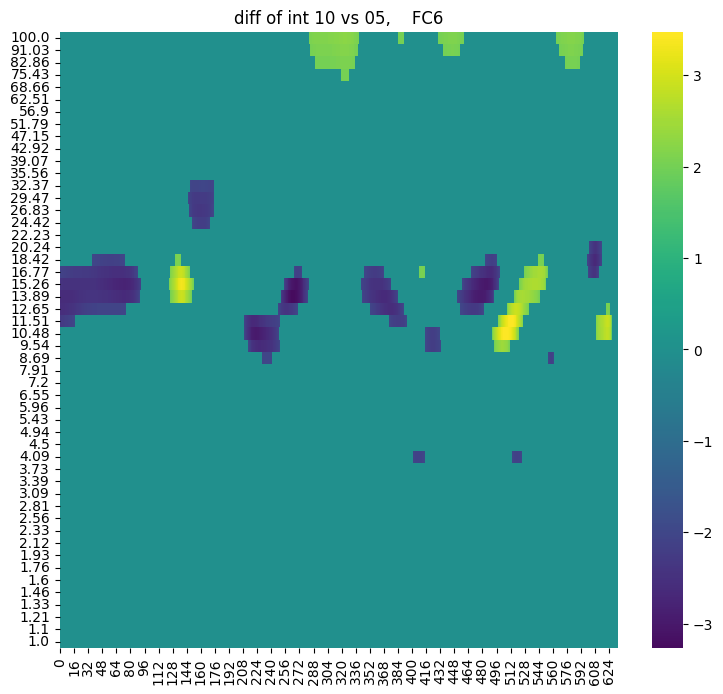

In [40]:
# vs int 5
for int_lv in ints:
    _ = give_me_zscored_diffs('FC6', '05', int_lv)

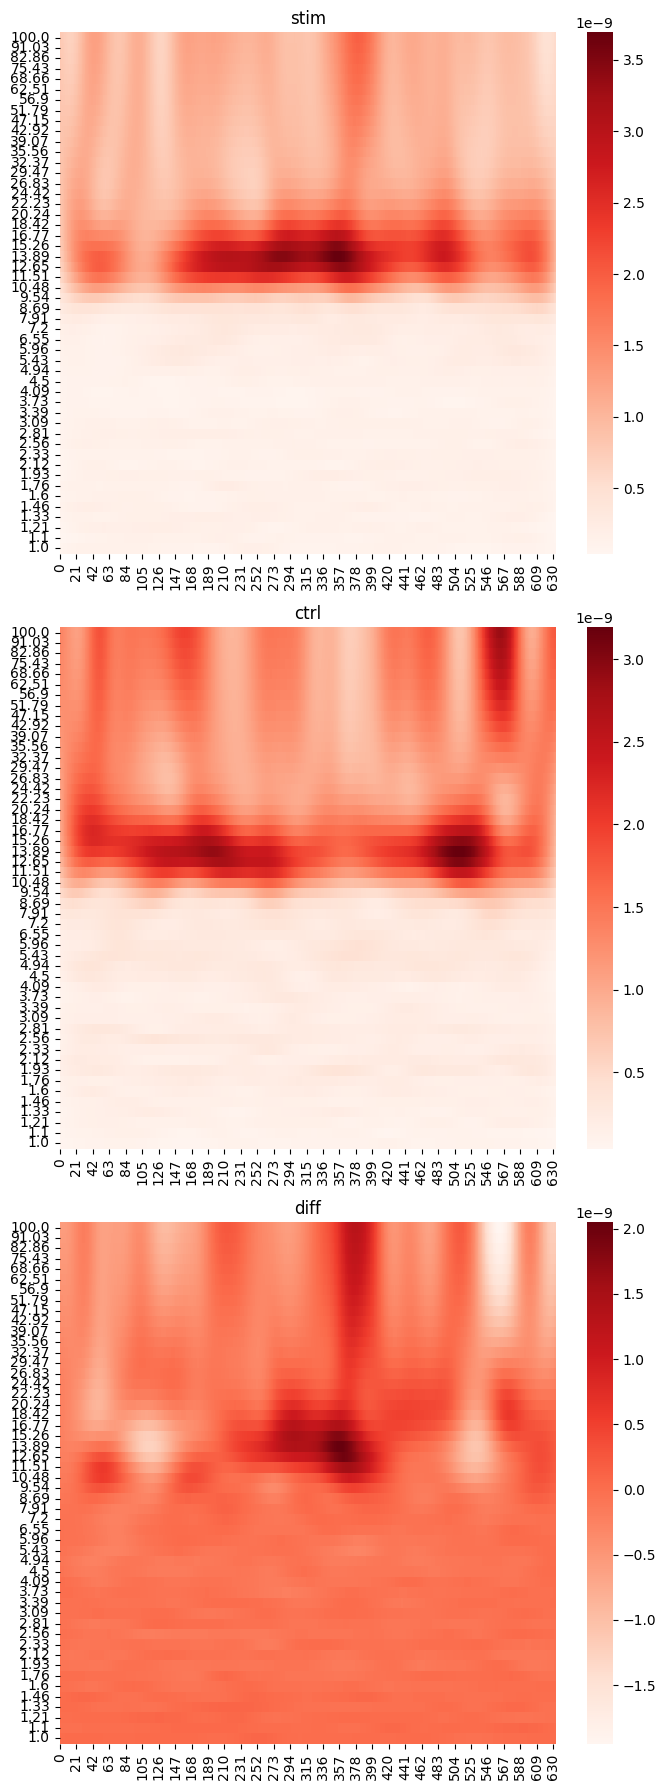

In [15]:
cnd = cond_dict['FC6']['avg']
ctr = ctrl_dict['FC6']['avg']
diff = get_diff(cnd, ctr)

array([[-2.15720944, -2.14495889, -2.13060803, ..., -2.17783578,
        -2.19719452, -2.21553725],
       [-2.08308099, -2.07181634, -2.05863117, ..., -2.12290186,
        -2.13997062, -2.15611883],
       [-1.99748939, -1.98734254, -1.97548372, ..., -2.05855284,
        -2.07301253, -2.08666106],
       ...,
       [ 0.98344955,  0.99262336,  1.00240898, ...,  0.48617038,
         0.49101855,  0.49555435],
       [ 0.9431755 ,  0.94798803,  0.95316222, ...,  0.5919856 ,
         0.59108142,  0.59026947],
       [ 1.19225723,  1.20497953,  1.21815206, ...,  0.58513038,
         0.58676832,  0.58831669]])

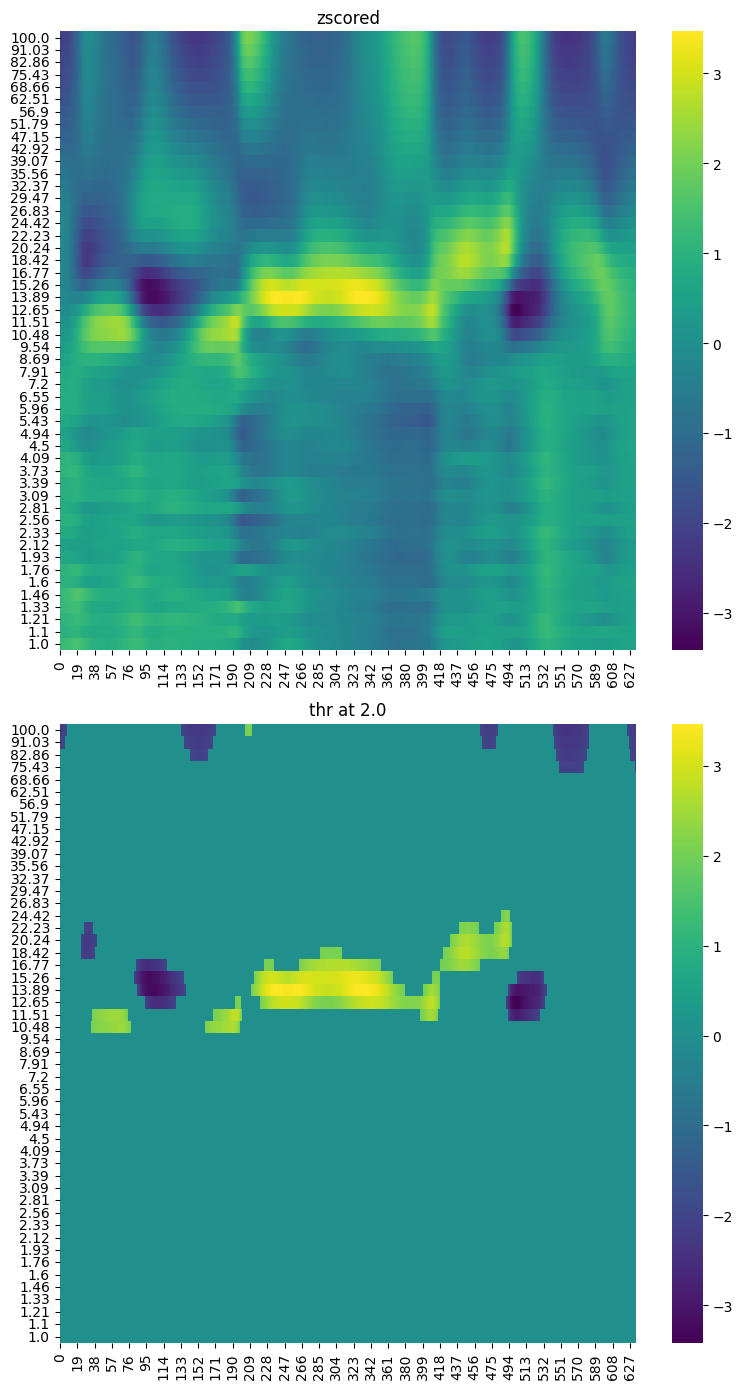

In [16]:
zscore_and_thresh(diff)